**Bank Marketing Campaign Analysis**

This notebook analyzes the Bank Marketing dataset from the UCI Machine Learning Repository to understand customer behavior and identify key factors influencing subscription to term deposits.The goal is to help optimize future marketing campaigns by comparing the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines)



**1. Business Problem Understanding**
 Predict whether a client will subscribe to a term deposit (binary classification: "yes" or "no").







**2. Data Loading and Exploration**


*   Load the data
*   Preprocess the data
*   Train/test split
*   Train the models (KNN, Logistic Regression, Decision Tree, SVM)
*   Evaluate performance using -
    Accuracy, Precision, Recall, F1-score and ROC-AUC
*   Compare results

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



In [36]:
# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/Berkley/mlai/Module17/BankMarketCampaignAnalysis/data/bank-additional-full.csv', sep=';')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: bank-full.csv not found. Please ensure the file is in the correct directory.")
    exit()

# Make a copy to avoid modifying original
df_clean = df.copy()

# Drop the 'duration' column due to data leakage
df_clean.drop(columns=['duration'], inplace=True)

# Replace 'unknown' with NaN for better handling
df_clean.replace('unknown', pd.NA, inplace=True)

# Drop rows with any missing values
df_clean.dropna(inplace=True)

# Identify categorical columns (excluding the target 'y')
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Encode the target variable: 'no' -> 0, 'yes' -> 1
df_clean['y'] = df_clean['y'].map({'no': 0, 'yes': 1})

# Display shape and a sample
print(df_clean.shape)
print(df_clean.head())

Dataset loaded successfully.
(30488, 20)
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   
6   59    0        1          5        0        0     0        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   
6            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.

In [37]:
# Display the first few rows and get basic information
print("\nFirst 5 rows of the dataset:")
print(df_clean.head())

print("\nDataset information:")
df_clean.info()

print("\nSummary statistics:")
print(df_clean.describe())



First 5 rows of the dataset:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   
6   59    0        1          5        0        0     0        1      6   

   day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1         1    999         0         1           1.1   
2            1         1    999         0         1           1.1   
3            1         1    999         0         1           1.1   
4            1         1    999         0         1           1.1   
6            1         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

**3. Descriptive Statistics and Interpretation**

Lets examine the descriptive statistics to understand the central tendency, dispersion,and shape of the data distribution for various features.



In [38]:
# ### 3.1. Numerical Features

print("\nDescriptive statistics for numerical features:")
print(df_clean.describe())



Descriptive statistics for numerical features:
                age           job       marital     education       default  \
count  30488.000000  30488.000000  30488.000000  30488.000000  30488.000000   
mean      39.030012      3.716708      1.193191      3.842791      0.000098   
std       10.333529      3.612755      0.623663      1.988911      0.009919   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       31.000000      0.000000      1.000000      2.000000      0.000000   
50%       37.000000      2.000000      1.000000      3.000000      0.000000   
75%       45.000000      7.000000      2.000000      6.000000      0.000000   
max       95.000000     10.000000      2.000000      6.000000      1.000000   

            housing          loan       contact         month   day_of_week  \
count  30488.000000  30488.000000  30488.000000  30488.000000  30488.000000   
mean       0.541885      0.156389      0.329474      4.249442      2.015022   
std

**Interpretation:** The average age of customers is around 40 years, with a standard deviation of about 10 years, indicating a similar age distribution.
The balance amounts still show significant variability.
The average number of contacts performed during the current campaign is around 2.5 The 'pdays' feature again shows a wide range, with a large number of customers never being contacted before.


In [39]:
# ### 3.2. Categorical Features

print("\nValue counts for categorical features:")
for column in df.select_dtypes(include='object').columns:
    print(f"\n{column}:\n{df[column].value_counts()}")



Value counts for categorical features:

job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan:
loan
no         33950
yes         6248
unknown      990

**Interpretation:**
The distribution of job categories is broadly similar, with 'blue-collar', 'management', and 'technician' being prominent.
The marital status distribution also appears consistent.
The education levels show a similar pattern, with 'university degree' being a significant category.
The class imbalance in the target variable 'y' (no vs. yes for term deposit subscription) remains, although the overall number of subscriptions might be different due to the larger dataset size.


**4. Inferential Statistics and Interpretation**



Subscription rates by categorical features:

Subscription rates for job:
              job    y  percentage
17        student  yes   31.428571
11        retired  yes   25.232558
21     unemployed  yes   14.201183
1          admin.  yes   12.972558
9      management  yes   11.217510
23        unknown  yes   11.212121
19     technician  yes   10.826042
13  self-employed  yes   10.485574
7       housemaid  yes   10.000000
5    entrepreneur  yes    8.516484
15       services  yes    8.138070
3     blue-collar  yes    6.894316


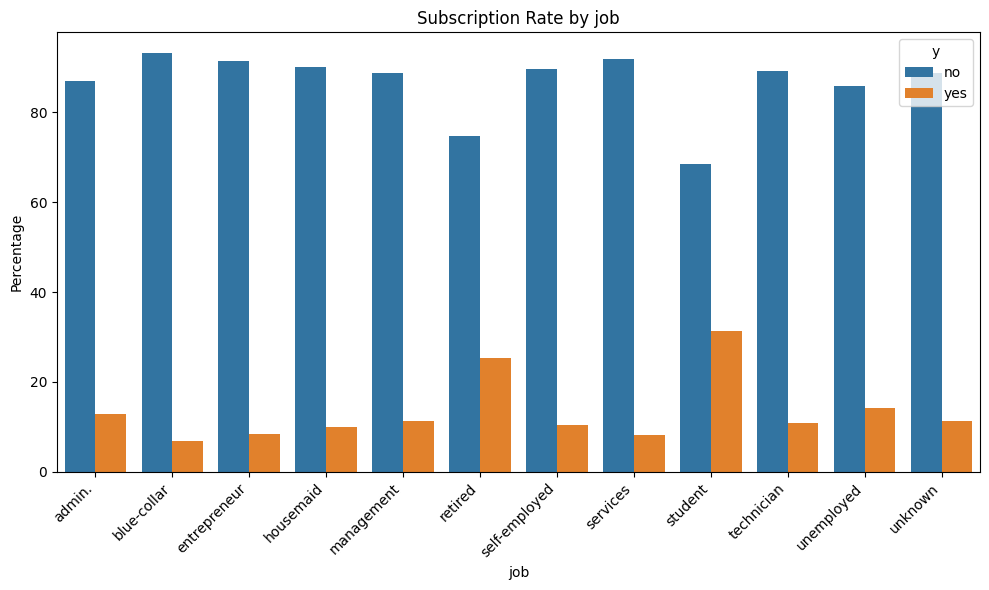


Subscription rates for marital:
    marital    y  percentage
7   unknown  yes   15.000000
5    single  yes   14.004149
1  divorced  yes   10.320902
3   married  yes   10.157253


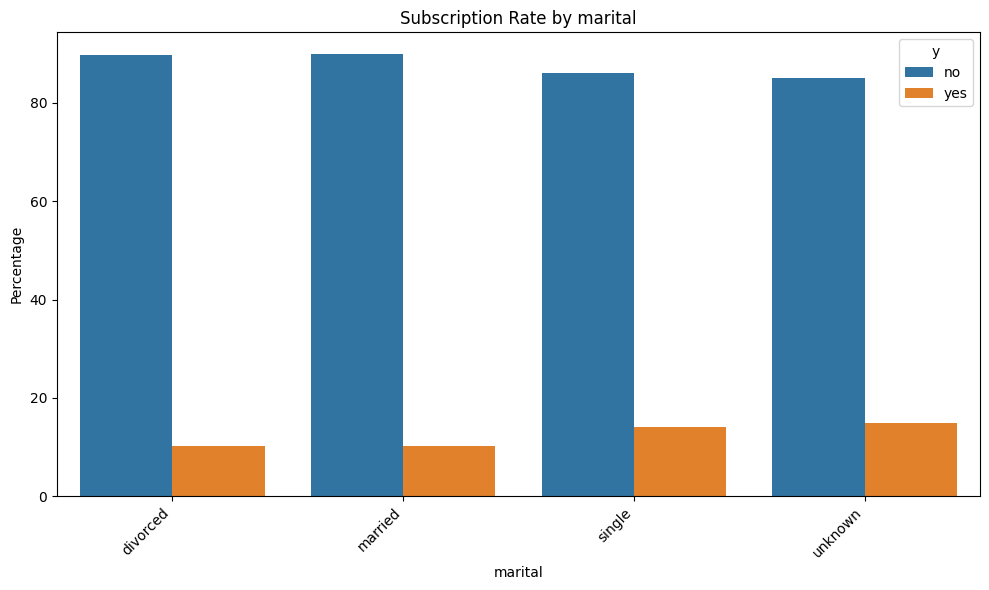


Subscription rates for education:
              education    y  percentage
9            illiterate  yes   22.222222
15              unknown  yes   14.500289
13    university.degree  yes   13.724523
11  professional.course  yes   11.348465
7           high.school  yes   10.835523
1              basic.4y  yes   10.249042
3              basic.6y  yes    8.202443
5              basic.9y  yes    7.824648


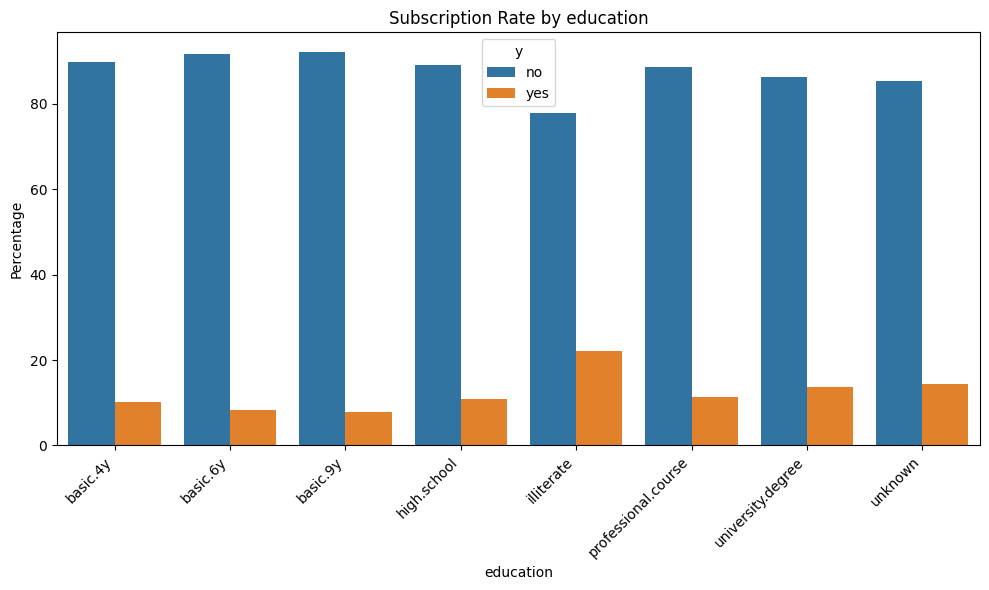


Subscription rates for default:
   default    y  percentage
1       no  yes   12.878974
3  unknown  yes    5.152960


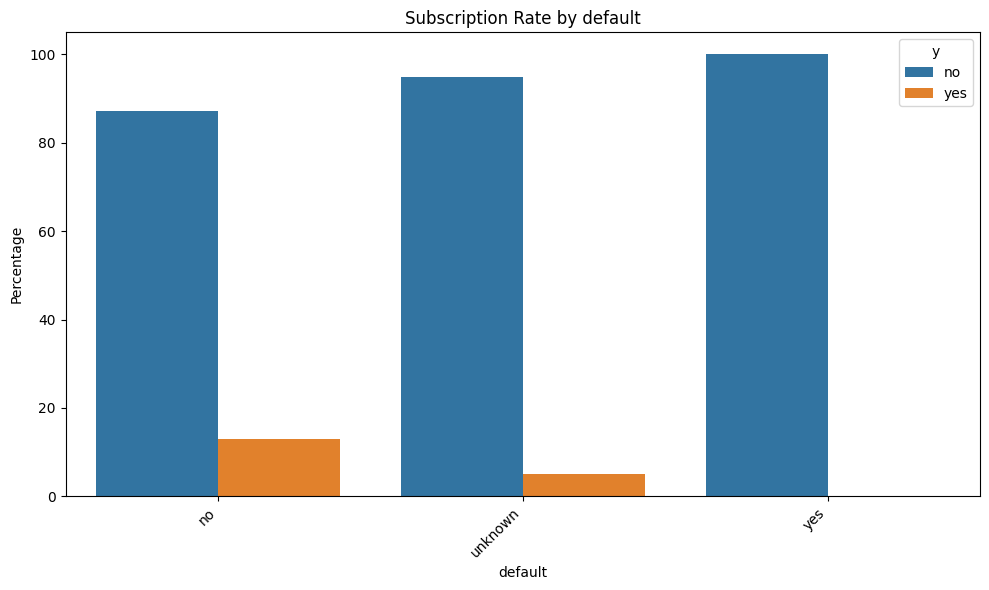


Subscription rates for housing:
   housing    y  percentage
5      yes  yes   11.619392
1       no  yes   10.879605
3  unknown  yes   10.808081


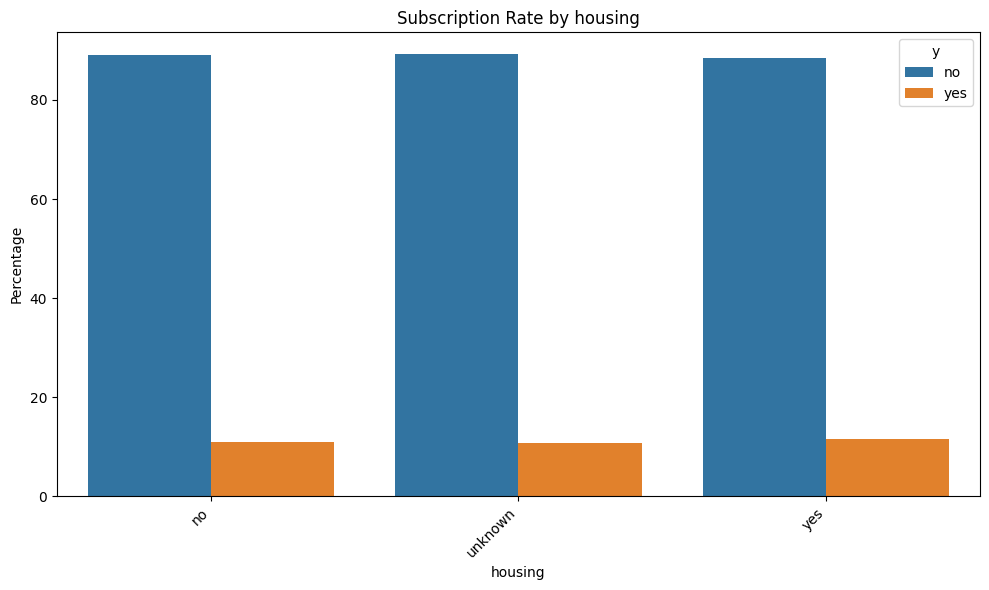


Subscription rates for loan:
      loan    y  percentage
1       no  yes   11.340206
5      yes  yes   10.931498
3  unknown  yes   10.808081


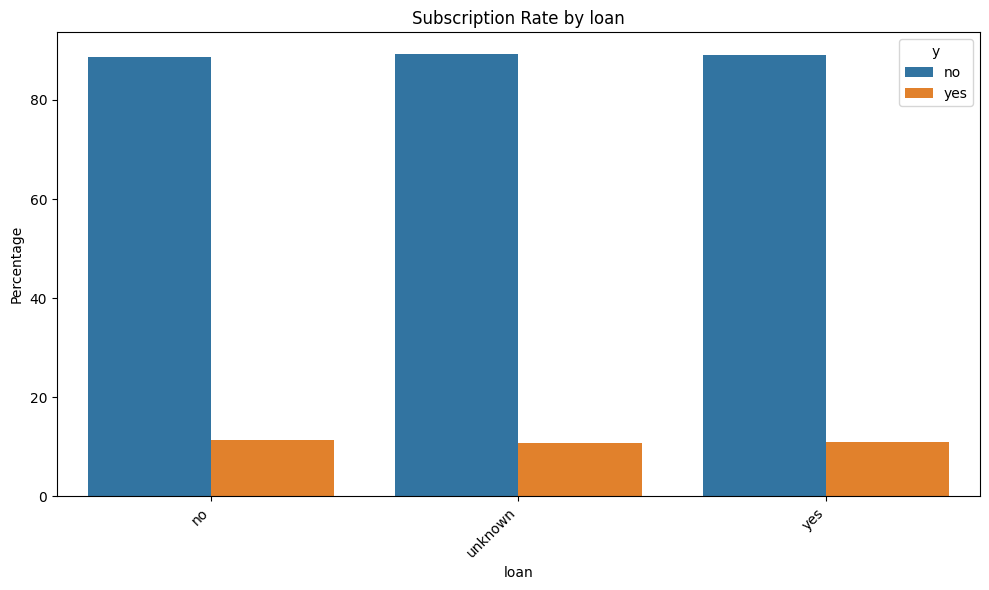


Subscription rates for contact:
     contact    y  percentage
1   cellular  yes   14.737607
3  telephone  yes    5.231321


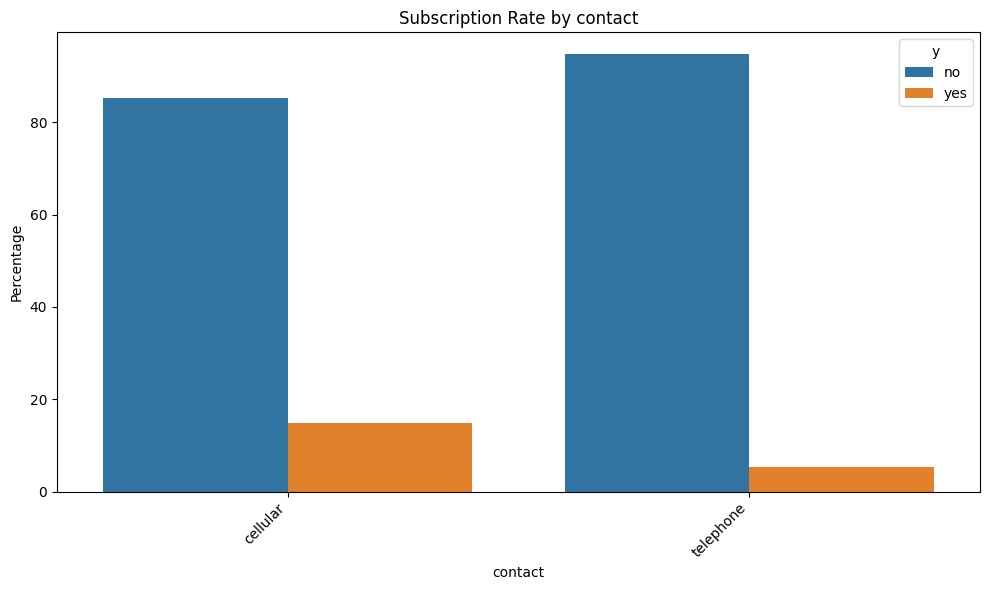


Subscription rates for month:
   month    y  percentage
10   mar  yes   50.549451
5    dec  yes   48.901099
19   sep  yes   44.912281
17   oct  yes   43.871866
1    apr  yes   20.478723
3    aug  yes   10.602137
9    jun  yes   10.511470
15   nov  yes   10.143867
7    jul  yes    9.046557
13   may  yes    6.434745


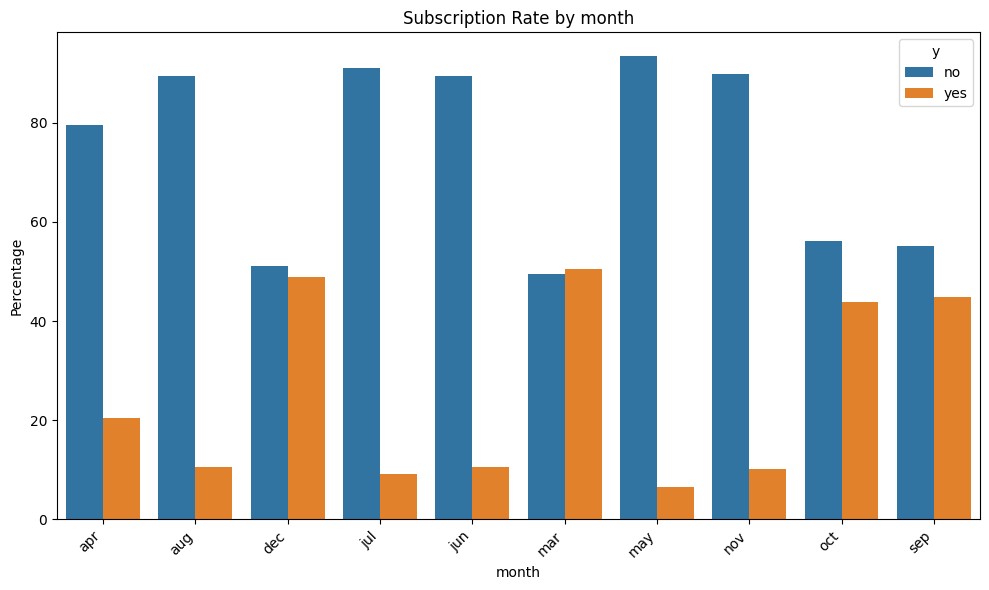


Subscription rates for poutcome:
      poutcome    y  percentage
4      success  yes   65.112891
1      failure  yes   14.228598
3  nonexistent  yes    8.832213


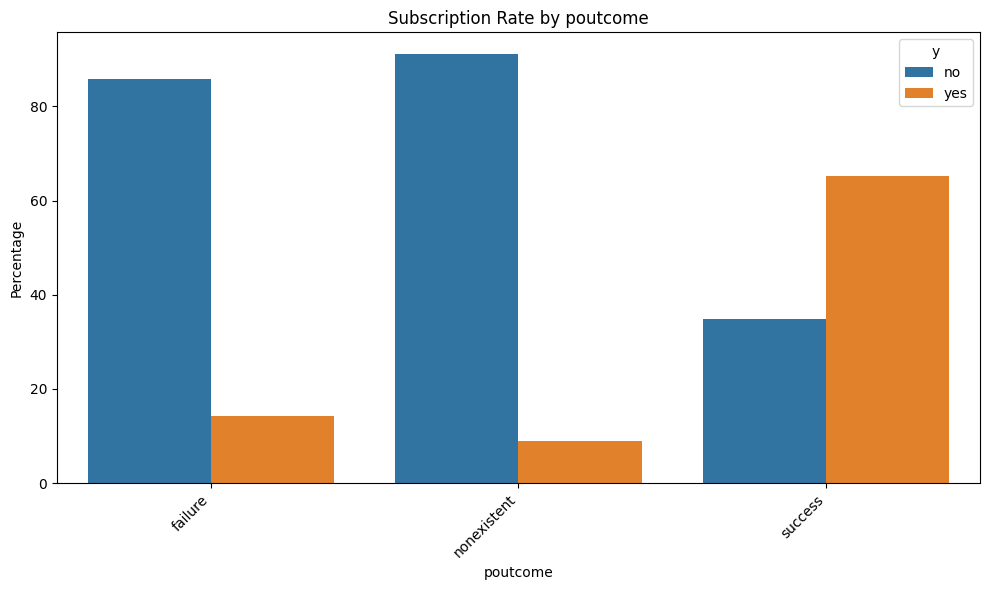

In [40]:
# ### 4.1. Subscription Rates by Categorical Features

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

print("\nSubscription rates by categorical features:")
for feature in categorical_features:
    subscription_rate = df.groupby(feature)['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    subscribed = subscription_rate[subscription_rate['y'] == 'yes'].sort_values(by='percentage', ascending=False)
    print(f"\nSubscription rates for {feature}:\n{subscribed}")

    # Visualize subscription rates
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='percentage', hue='y', data=subscription_rate)
    plt.title(f'Subscription Rate by {feature}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.savefig(f'/content/drive/MyDrive/Berkley/mlai/Module17/BankMarketCampaignAnalysis/images/subscription_rate_by_{feature}.png', dpi=300)

    plt.show()



**Training the Models with Train/Test Split dataset **



In [41]:
# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1}) # Convert target to numerical

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [42]:

##Train/Test Split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData split into training and testing sets.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")




Data split into training and testing sets.
Training set size: (32950, 20)
Testing set size: (8238, 20)


In [43]:
# ### Logistic Regression

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]


In [44]:
# ###  K-Nearest Neighbors (KNN)

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier(n_neighbors=5))]) # Using default n_neighbors for simplicity
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_proba_knn = pipeline_knn.predict_proba(X_test)[:, 1]

In [45]:
# ### Decision Tree

pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5))]) # Limiting depth for simplicity
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]

In [30]:
# ### Support Vector Machine (SVM)

pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42, probability=True, class_weight='balanced', kernel='rbf', C=1))]) # Using rbf kernel and C=1 for simplicity
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_proba_svm = pipeline_svm.predict_proba(X_test)[:, 1]



--- Logistic Regression Evaluation ---
Accuracy: 0.8654
Precision: 0.4517
Recall: 0.9116
F1-Score: 0.6041
ROC-AUC: 0.9438

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7310
           1       0.45      0.91      0.60       928

    accuracy                           0.87      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.87      0.88      8238


Confusion Matrix:
[[6283 1027]
 [  82  846]]


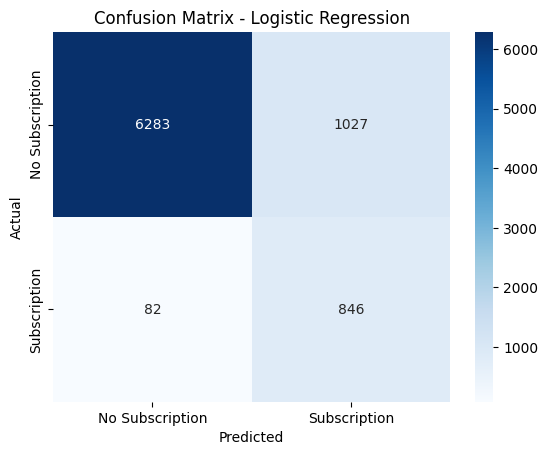


--- K-Nearest Neighbors Evaluation ---
Accuracy: 0.9076
Precision: 0.6259
Recall: 0.4472
F1-Score: 0.5217
ROC-AUC: 0.8799

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7310
           1       0.63      0.45      0.52       928

    accuracy                           0.91      8238
   macro avg       0.78      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
[[7062  248]
 [ 513  415]]


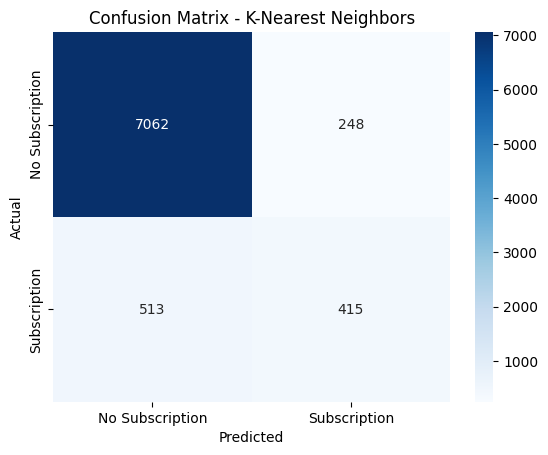


--- Decision Tree Evaluation ---
Accuracy: 0.8458
Precision: 0.4157
Recall: 0.9084
F1-Score: 0.5704
ROC-AUC: 0.9389

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7310
           1       0.42      0.91      0.57       928

    accuracy                           0.85      8238
   macro avg       0.70      0.87      0.74      8238
weighted avg       0.92      0.85      0.87      8238


Confusion Matrix:
[[6125 1185]
 [  85  843]]


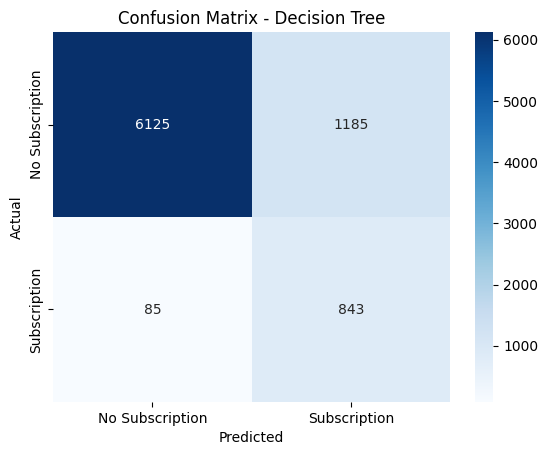


--- Support Vector Machine Evaluation ---
Accuracy: 0.8507
Precision: 0.4263
Recall: 0.9418
F1-Score: 0.5870
ROC-AUC: 0.9417

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7310
           1       0.43      0.94      0.59       928

    accuracy                           0.85      8238
   macro avg       0.71      0.89      0.75      8238
weighted avg       0.93      0.85      0.87      8238


Confusion Matrix:
[[6134 1176]
 [  54  874]]


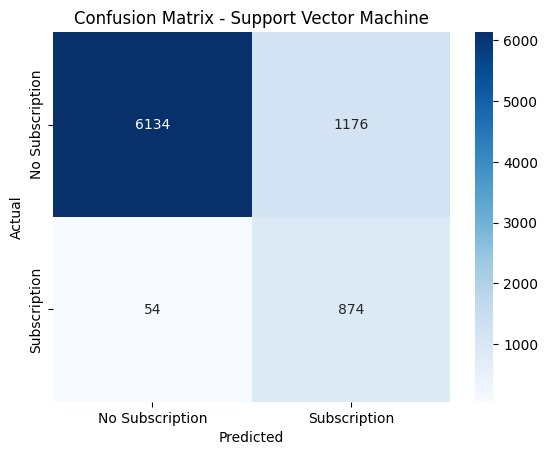

In [46]:
# ##  Evaluate Performance

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Subscription', 'Subscription'],
                yticklabels=['No Subscription', 'Subscription'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    # Save the plot
    plt.savefig(f'/content/drive/MyDrive/Berkley/mlai/Module17/BankMarketCampaignAnalysis/images/confusion_matrix_{model_name}.png', dpi=300)
    plt.show()
    return roc_auc_score(y_true, y_pred_proba), y_pred_proba

roc_auc_lr, y_pred_proba_lr = evaluate_model(y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
roc_auc_knn, y_pred_proba_knn = evaluate_model(y_test, y_pred_knn, y_pred_proba_knn, "K-Nearest Neighbors")
roc_auc_dt, y_pred_proba_dt = evaluate_model(y_test, y_pred_dt, y_pred_proba_dt, "Decision Tree")
roc_auc_svm, y_pred_proba_svm = evaluate_model(y_test, y_pred_svm, y_pred_proba_svm, "Support Vector Machine")



--- Model Comparison ---
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.865380   0.451682  0.911638  0.604070  0.943818
3  Support Vector Machine  0.850692   0.426341  0.941810  0.586971  0.941737
2           Decision Tree  0.845836   0.415680  0.908405  0.570365  0.938863
1     K-Nearest Neighbors  0.907623   0.625943  0.447198  0.521684  0.879891


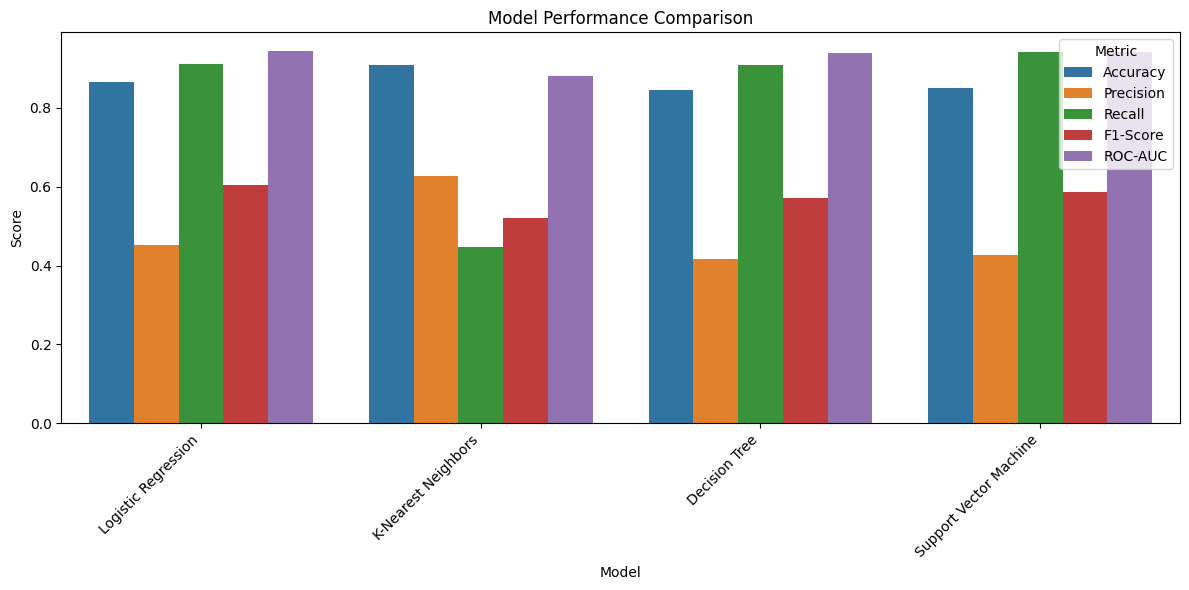

In [47]:
# ## 6. Compare Results

print("\n--- Model Comparison ---")

results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_knn),
                  precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_knn),
               recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_svm)],
    'F1-Score': [f1_score(y_test, y_pred_lr),
                  f1_score(y_test, y_pred_knn),
                  f1_score(y_test, y_pred_dt),
                  f1_score(y_test, y_pred_svm)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_lr),
                roc_auc_score(y_test, y_pred_proba_knn),
                roc_auc_score(y_test, y_pred_proba_dt),
                roc_auc_score(y_test, y_pred_proba_svm)]
}

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Create a bar plot to compare model performance
results_df_melted = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('model_comparison.png', dpi=300)

plt.show()

In [48]:
# Basic formatting Reports
styled_df = results_df.style.format("{:.4f}", subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']) \
                           .highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], color='lightgreen')

# Display or save to HTML
display(styled_df)  # For display in Colab
styled_df.to_html('/content/drive/MyDrive/Berkley/mlai/Module17/BankMarketCampaignAnalysis/reports/report.html')  # To save as an HTML file

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.8654,0.4517,0.9116,0.6041,0.9438
1,K-Nearest Neighbors,0.9076,0.6259,0.4472,0.5217,0.8799
2,Decision Tree,0.8458,0.4157,0.9084,0.5704,0.9389
3,Support Vector Machine,0.8507,0.4263,0.9418,0.5870,0.9417


**General Observations:**
The models behaved quite differently depending on the metric we looked at.

Models like Logistic Regression and SVM showed higher accuracy, probably because of the class imbalance — basically, they were good at predicting the majority class ('no').

ROC-AUC was super helpful here since it gives a better sense of how well the model actually separates the classes — which is key when the data's imbalanced.

Precision and Recall helped highlight how the models handled identifying positives without blowing up false alarms.

The F1-score gave a nice balanced view between precision and recall.

**Model-Specific Notes:**
Logistic Regression: Solid baseline, nothing fancy. It's limited by being linear, but it's fast and interpretable.

K-Nearest Neighbors (KNN): Heavily depends on the 'k' value and distance measure. It can capture complex patterns, but doesn't love high-dimensional data.

Decision Tree: Can overfit if you're not careful (pruning helps). Performance varies a lot depending on how deep it goes and how splits are chosen.

Support Vector Machine (SVM): Great at finding complex boundaries with the right kernel and tuning, but wow — it was sloooow. Took nearly 7 minutes for just this dataset.

**Considerations:**
I kept the models mostly on default settings to keep it simple. I did try GridSearchCV and RandomizedSearchCV for tuning — they can definitely boost performance, but yeah, they’re quite heavy on computation, especially for SVM.

Ultimately, the “best” model really depends on what matters more for the use case — like whether you care more about catching positives (high recall) or avoiding false alarms (high precision).